In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

Taking a peek at the geographical variables in the dataset


In [4]:
data = pd.read_csv('~/Downloads/accepted_2007_to_2018Q4.csv.gz', compression='gzip')
print(data)

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_31408/494099425.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('~/Downloads/accepted_2007_to_2018Q4.csv.gz', compression='gzip')


                                                       id  member_id  \
0                                                68407277        NaN   
1                                                68355089        NaN   
2                                                68341763        NaN   
3                                                66310712        NaN   
4                                                68476807        NaN   
...                                                   ...        ...   
2260696                                          88985880        NaN   
2260697                                          88224441        NaN   
2260698                                          88215728        NaN   
2260699  Total amount funded in policy code 1: 1465324575        NaN   
2260700   Total amount funded in policy code 2: 521953170        NaN   

         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           3600.0       3600.0           3600.0   36 months 

In [5]:
data['addr_state'].value_counts()

addr_state
CA    314533
NY    186389
TX    186335
FL    161991
IL     91173
NJ     83132
PA     76939
OH     75132
GA     74196
VA     62954
NC     62730
MI     58770
MD     54008
AZ     53777
MA     51784
CO     48183
WA     47060
MN     39517
IN     37515
MO     36084
CT     35785
TN     35483
NV     32657
WI     29877
SC     28003
AL     27284
OR     26789
LA     25759
KY     21887
OK     20691
KS     19109
AR     17074
UT     14993
MS     12639
NM     11986
NH     11142
HI     10668
RI     10005
WV      8351
NE      7819
DE      6458
MT      6299
DC      5356
AK      5231
ME      4974
VT      4937
WY      4748
SD      4549
ID      4308
ND      3591
IA        14
Name: count, dtype: int64

In [4]:
# Initial exploration
print("Dataset shape:", data.shape)

# Check first few rows
print("\nFirst few rows:")
print(data.head())

# Check columns
print("\nColumns in dataset:")
print(data.columns.tolist())

# Basic info about data types and missing values
print("\nDataset info:")
print(data.info())

Dataset shape: (2260701, 151)

First few rows:
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None


There are 150+ columns in the input dataset. I am going to use only the columns that's of interest and relevant to the geographical/regional analysis. Those 16 coulmns are used to create geo_data dataframe. 
All 16 columns have NAs in it but only three columns description, employment length and employment title got a lot of NAs. 
I'm not planning to use those three columns in my analysis and that's the reason why I'm going to drop those columns from geo_data data frame.
As other columns have only very few less than 40 out of 2M rows as NAs, I am going to drop those rows from the data frame. Dropping these won't make a big difference in the final analysis. 

In [6]:
geo_columns = ['loan_amnt','int_rate','acc_now_delinq','addr_state','application_type','desc','emp_length','emp_title','zip_code','home_ownership','last_fico_range_high','last_fico_range_low','issue_d','grade','sub_grade','loan_status']
geo_data = data[geo_columns]

In [9]:
columns_with_nas = geo_data.isna().any()
count_of_nas = geo_data.isna().sum()
print(count_of_nas)
print(columns_with_nas)

loan_amnt                    33
int_rate                     33
acc_now_delinq               62
addr_state                   33
application_type             33
desc                    2134636
emp_length               146940
emp_title                167002
zip_code                     34
home_ownership               33
last_fico_range_high         33
last_fico_range_low          33
issue_d                      33
grade                        33
sub_grade                    33
loan_status                  33
dtype: int64
loan_amnt               True
int_rate                True
acc_now_delinq          True
addr_state              True
application_type        True
desc                    True
emp_length              True
emp_title               True
zip_code                True
home_ownership          True
last_fico_range_high    True
last_fico_range_low     True
issue_d                 True
grade                   True
sub_grade               True
loan_status             True
dtype: bool

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_31408/3563653301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_data.dropna(inplace=True)
/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_31408/3563653301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_data['is_delinquent'] = geo_data['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)', 'Charged Off', 'Default'])


314533
14
<class 'pandas.core.series.Series'>
Index: 51 entries, AK to WY
Series name: is_delinquent
Non-Null Count  Dtype  
--------------  -----  
51 non-null     float64
dtypes: float64(1)
memory usage: 2.9+ KB


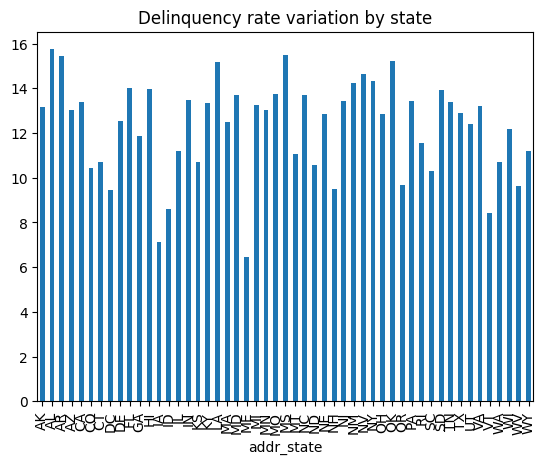

In [10]:
geo_columns_new = ['loan_amnt','int_rate','acc_now_delinq','addr_state','application_type','zip_code','home_ownership','last_fico_range_high','last_fico_range_low','issue_d','grade','sub_grade','loan_status']
geo_data = data[geo_columns_new]
geo_data.dropna(inplace=True)
geo_data['is_delinquent'] = geo_data['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)', 'Charged Off', 'Default'])
delinq_state_cnt = geo_data.groupby('addr_state')['is_delinquent'].count()
delinq_state_rate = geo_data.groupby('addr_state')['is_delinquent'].mean()*100
delinq_state_rate.plot(kind='bar',title='Delinquency rate variation by state')
print(delinq_state_cnt.max())
print(delinq_state_cnt.min())
delinq_state_rate.info()

In [6]:
mean_cols = ['is_delinquent','loan_amnt','int_rate']
geo_mean_df= geo_data.groupby('addr_state')[mean_cols].mean()
geo_mean_df['is_delinquent'] = geo_mean_df['is_delinquent']*100
geo_mean_df = geo_mean_df.reset_index()
geo_mean_df.head()

,addr_state,is_delinquent,loan_amnt,int_rate
0,AK,13.171478,17285.394762,13.326289
1,AL,15.741827,14686.235523,13.567154
2,AR,15.444536,14094.558979,13.354703
3,AZ,13.012998,14522.307399,12.962906
4,CA,13.403999,15287.680784,12.976528


In [7]:
state_map = px.choropleth(geo_mean_df,locations='addr_state',title='Delinquency rate across US States',locationmode='USA-states',color='is_delinquent',scope='usa')
state_map.show()

Choropleth graph shows us that highest percentage of loan defaults happen in sun belt states excluding TX. Only NY is in the top defaulter list with 14.64%. Let's slice and dice this further to see if we can draw any relationship to the local economic indicators to the default rates. Before that, lets see how the loan amount varies by state and what's the top reason for loan by state.

On the same note, States ME,IA,VT,ID & DC have low delinquency rates

In [8]:
top_deliq_states = geo_mean_df.nlargest(10,'is_delinquent')
print(top_deliq_states)

   addr_state  is_delinquent     loan_amnt   int_rate
1          AL      15.741827  14686.235523  13.567154
25         MS      15.483820  14750.150328  13.445814
2          AR      15.444536  14094.558979  13.354703
36         OK      15.219177  15014.517181  13.263297
18         LA      15.155868  14831.564696  13.224466
33         NV      14.640047  14397.075665  13.205397
34         NY      14.317905  14846.158840  13.260060
32         NM      14.233272  14874.063491  13.155975
9          FL      14.020532  14402.247656  13.164735
11         HI      13.957630  15894.460067  13.786782


Low delinquency rates or safe lending states:

In [9]:
low_deliq_states = geo_mean_df.nsmallest(5,'is_delinquent')
print(low_deliq_states)

   addr_state  is_delinquent     loan_amnt   int_rate
21         ME       6.453559  14740.756936  12.817557
12         IA       7.142857   8148.214286  12.631429
46         VT       8.426170  13815.429411  12.986204
13         ID       8.588672  14412.354921  13.295014
7          DC       9.447349  15815.393951  12.578114


Loan amount analysis by state:

In [10]:
state_map_amnt = px.choropleth(geo_mean_df,locations='addr_state',title='Loan amount distribution across US States',locationmode='USA-states',color='loan_amnt',scope='usa')
state_map_amnt.show()

States with highest and lowest average loan amounts

In [11]:
low_amnt_states = geo_mean_df.nsmallest(5,'loan_amnt')
print('lowest loan amounts')
print(low_amnt_states)

lowest loan amounts
   addr_state  is_delinquent     loan_amnt   int_rate
12         IA       7.142857   8148.214286  12.631429
46         VT       8.426170  13815.429411  12.986204
26         MT      11.081124  13997.590887  12.956177
2          AR      15.444536  14094.558979  13.354703
37         OR       9.671880  14165.025757  12.954578


In [12]:
high_amnt_states = geo_mean_df.nlargest(10,'loan_amnt')
print('highest loan amounts')
print(high_amnt_states)

highest loan amounts
   addr_state  is_delinquent     loan_amnt   int_rate
0          AK      13.171478  17285.394762  13.326289
45         VA      13.222353  16091.366315  13.113697
11         HI      13.957630  15894.460067  13.786782
20         MD      13.696119  15865.862465  13.236114
31         NJ      13.443680  15832.747618  12.989854
7          DC       9.447349  15815.393951  12.578114
43         TX      12.907398  15730.450667  12.999444
19         MA      12.472965  15675.628090  12.676827
50         WY      11.183656  15617.802233  13.210143
28         ND      10.554163  15489.522417  13.245795


IA is a standout here, we have low delinquency rates and low average loan amount of 8K, As a lender, you can say that it's safe to fund a loan within 8K and be confident that 90% of the time it will be repaid without default. VT closely follows IA but the loan amount average is not low like IA, it's impresssive to have low delinquency although the loan amount average is not so low. 
DC is another standout region, which is in top list of low delinquency rates and also making it to the top of the loan amount too. It's very safe to fund a loan originating out of DC than TX or NJ or HI.

Interest rate variation by state:

In [13]:
state_map_int = px.choropleth(geo_mean_df,locations='addr_state',title='Interest rate distribution across US States',locationmode='USA-states',color='int_rate',scope='usa')
state_map_int.show()

Average interest rate is stable across US states with low being 12.6 and high being 13.8
Interest rates in DC, IA, MA & NH are in the lower end of the spectrum whereas it's in the higher end for HI, AL, MS & AR

In [14]:
low_int_states = geo_mean_df.nsmallest(10,'int_rate')
print('lowest int rates')
print(low_int_states)

lowest int rates
   addr_state  is_delinquent     loan_amnt   int_rate
7          DC       9.447349  15815.393951  12.578114
12         IA       7.142857   8148.214286  12.631429
19         MA      12.472965  15675.628090  12.676827
30         NH       9.495602  14940.719799  12.699506
21         ME       6.453559  14740.756936  12.817557
48         WI      12.173244  14451.452622  12.849949
5          CO      10.433140  15103.339871  12.887731
37         OR       9.671880  14165.025757  12.954578
26         MT      11.081124  13997.590887  12.956177
14         IL      11.196297  15470.061860  12.960124


In [15]:
high_int_states = geo_mean_df.nlargest(10,'int_rate')
print('highest int rates')
print(high_int_states)

highest int rates
   addr_state  is_delinquent     loan_amnt   int_rate
11         HI      13.957630  15894.460067  13.786782
1          AL      15.741827  14686.235523  13.567154
25         MS      15.483820  14750.150328  13.445814
2          AR      15.444536  14094.558979  13.354703
0          AK      13.171478  17285.394762  13.326289
13         ID       8.588672  14412.354921  13.295014
42         TN      13.409238  14720.912127  13.287132
40         SC      10.316752  14944.180981  13.266587
36         OK      15.219177  15014.517181  13.263297
34         NY      14.317905  14846.158840  13.260060


Some of the high deliquent rate states are in the list for high interest rates too. There is a definite correlation between these two at the state level.

Lets delve deeper into the geographical analysis to see if any specific region within the states have any surprising lending trend such as going away from the state trend. I am going to use the 3 digit zip code data to plot the same values and see how they play out.


In [16]:
mean_cols_zip = ['is_delinquent','loan_amnt','int_rate']
geo_mean_zip= geo_data.groupby('zip_code')[mean_cols_zip].mean()
geo_mean_zip['is_delinquent'] = geo_mean_zip['is_delinquent']*100
geo_mean_zip = geo_mean_zip.reset_index()
geo_mean_zip['3_dig_zip']=geo_mean_zip['zip_code'].str[:3]
geo_mean_zip.head()

,zip_code,is_delinquent,loan_amnt,int_rate,3_dig_zip
0,007xx,20.000000,17500.000000,15.444000,007
1,008xx,12.500000,12637.500000,11.050000,008
2,009xx,0.000000,14812.500000,16.355000,009
3,010xx,14.211957,14977.778533,12.606739,010
4,011xx,15.508885,14314.196284,13.519903,011


In [17]:
top_deliq_zip = geo_mean_zip.nlargest(10,'is_delinquent')
print('Zip codes with high delinquency rates')
print(top_deliq_zip)
low_deliq_zip = geo_mean_zip.nsmallest(10,'is_delinquent')
print('Zip codes with low delinquency rates')
print(low_deliq_zip)

Zip codes with high delinquency rates
    zip_code  is_delinquent     loan_amnt   int_rate 3_dig_zip
498    513xx     100.000000  12000.000000  11.440000       513
501    516xx     100.000000  21000.000000  18.240000       516
506    524xx     100.000000  12000.000000  14.490000       524
546    568xx     100.000000  15000.000000  18.250000       568
616    643xx     100.000000   9750.000000  15.800000       643
654    682xx     100.000000   7000.000000   6.990000       682
846    889xx     100.000000  13500.000000  13.980000       889
894    938xx     100.000000  15000.000000  20.990000       938
489    502xx      71.428571  14432.142857  18.571429       502
335    345xx      66.666667  26333.333333  11.743333       345
Zip codes with low delinquency rates
    zip_code  is_delinquent     loan_amnt   int_rate 3_dig_zip
2      009xx            0.0  14812.500000  16.355000       009
48     055xx            0.0  16000.000000  13.990000       055
85     092xx            0.0  16244.230769  

There are some interesting insights in the data. There are some zip codes where there are 100% delinquencies and some with 0% defaults. I'm interested in seeing how many regions are with 0% here.


In [18]:
safe_zip = geo_mean_zip[geo_mean_zip['is_delinquent']==0]
safe_zip.shape[0]

51

There are 51 zip code regions which are ultra safe and I want to see on how many loans are funded from these regions

In [19]:
safe_zip_list = list(safe_zip['zip_code'])
safe_zip_loans = data[data['zip_code'].isin(safe_zip_list)]

In [20]:
print(safe_zip_loans)

               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
18710    67236527        NaN    24000.0      24000.0          23850.0   
19175    65707196        NaN     5000.0       5000.0           5000.0   
20503    67475509        NaN    20000.0      20000.0          20000.0   
26663    66650193        NaN     7200.0       7200.0           7200.0   
59277    65302718        NaN    24000.0      24000.0          24000.0   
...           ...        ...        ...          ...              ...   
2191179  94378031        NaN     1000.0       1000.0           1000.0   
2210411  92871812        NaN     6000.0       6000.0           6000.0   
2212411  70730879        NaN     6000.0       6000.0           6000.0   
2240139  91546899        NaN    15000.0      15000.0          15000.0   
2254699  89786691        NaN    16000.0      16000.0          16000.0   

               term  int_rate  installment grade sub_grade  ...  \
18710     60 months     14.48       564.43     C        

The population of ultra safe loans (137) are very low and minuscule amount compared to 2M loan population.I now want to see how many the ultra risk loans are there here based on zip codes


In [24]:
risky_zip = geo_mean_zip[geo_mean_zip['is_delinquent']==100]
risky_zip_list = list(risky_zip['zip_code'])
risky_zip_loans = data[data['zip_code'].isin(risky_zip_list)]
print(risky_zip_loans)


               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
349442   42964748        NaN    15000.0      15000.0          14975.0   
1120390  37317665        NaN    12000.0      12000.0          12000.0   
1148650  32169439        NaN     7000.0       7000.0           7000.0   
1204460  25306986        NaN    15000.0      15000.0          15000.0   
1225186  22402236        NaN    12000.0      12000.0          12000.0   
1236459  20690051        NaN    13500.0      13500.0          13500.0   
1274942  16511931        NaN    21000.0      21000.0          20950.0   
1874913   3286699        NaN     9750.0       9750.0           9675.0   

               term  int_rate  installment grade sub_grade  ...  \
349442    60 months     18.25       382.95     E        E1  ...   
1120390   60 months     11.44       263.55     B        B4  ...   
1148650   36 months      6.99       216.11     A        A3  ...   
1204460   36 months     20.99       565.05     E        E4  ...   
1225186

As expected there are only 8 loans which are disbursed for borrower in these zips. These two extremes can be ignored and see how the delinquency rates play out in other zips.